In [42]:
from numpy.random import seed
seed(1337)
import tensorflow as tf
#from tensorflow.random import set_seed
tf.random.set_seed(1337)

In [43]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise
from keras.utils import to_categorical
import keras
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [44]:
#Data corresponds to an emotion tag, a 48x48 greyscale picture flattened, and a tag indicating if the image belongs to the test set or the training set.
df = pd.read_csv('./data/fer2013.csv')

train = df[df['Usage']=='Training']
test = df[df['Usage']=='PublicTest']

#TODO: We might want to augment data with ImageDataGenerator 

#TODO: We might want to do some image pre-processing


#Splits data in training and testing, as well as formatting data to right input and output shapes

X_train = np.array(train.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32')))
X_test = np.array(test.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32')))

#Turn the array of 3D arrays into a 4D array
X_train = np.stack(X_train, axis=0)
X_test = np.stack(X_test, axis=0)

y_train = to_categorical(train['emotion'])
y_test =  to_categorical(test['emotion'])

#Splits off a validation set
X_val = X_train[-4000:]
y_val = y_train[-4000:]
X_train = X_train[:-4000]
y_train = y_train[:-4000]

print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [69]:
datagen = ImageDataGenerator(
        #rotation_range=10,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #brightness_range=(0.5,1.5),
        #zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
        #zca_whitening=True,
        #shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,    
        fill_mode='nearest')

In [70]:
#Define dimensions of input and output layers
D_in = X_train[0].shape
D_out = tuple(y_train[0].shape)
print(D_in)
print(D_out[0])

#Sets up model. To Bobby: Can we make this smarter so you and I can do different models?
model = Sequential()

#model.add(GaussianNoise(10, input_shape=(tuple(D_in))))

model.add(Conv2D(32, (3, 3), input_shape=(tuple(D_in))))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#model.add(Dense(8, activation='softmax'))

model.add(Dense(D_out[0], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#TODO: Train networks, evaluate results.

print(model.summary())

(48, 48, 1)
7
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
activation_40 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_41 (Activation)   (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 

In [71]:
callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.1,patience=10)]

batch_size = 64

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // batch_size,
    epochs=500, callbacks = callbacks)

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=500,
#                     # We pass some validation for
#                     # monitoring validation loss and metrics
#                     # at the end of each epoch
#                     validation_data=(X_val, y_val),
#                     callbacks = callbacks
#                    )

#print('\nhistory dict:', history.history)


Epoch 1/500
386/386 [==============================] - 7s 19ms/step - loss: 2.1948 - accuracy: 0.2880 - val_loss: 1.6322 - val_accuracy: 0.3600
Epoch 2/500
386/386 [==============================] - 8s 21ms/step - loss: 1.6084 - accuracy: 0.3770 - val_loss: 1.5085 - val_accuracy: 0.4317
Epoch 3/500
386/386 [==============================] - 8s 21ms/step - loss: 1.5339 - accuracy: 0.4109 - val_loss: 1.4690 - val_accuracy: 0.4320
Epoch 4/500
386/386 [==============================] - 7s 19ms/step - loss: 1.4799 - accuracy: 0.4327 - val_loss: 1.4101 - val_accuracy: 0.4703
Epoch 5/500
386/386 [==============================] - 8s 21ms/step - loss: 1.4469 - accuracy: 0.4499 - val_loss: 1.3923 - val_accuracy: 0.4770
Epoch 6/500
386/386 [==============================] - 8s 20ms/step - loss: 1.4119 - accuracy: 0.4603 - val_loss: 1.3435 - val_accuracy: 0.4908
Epoch 7/500
386/386 [==============================] - 7s 19ms/step - loss: 1.3795 - accuracy: 0.4782 - val_loss: 1.2996 - val_accuracy:

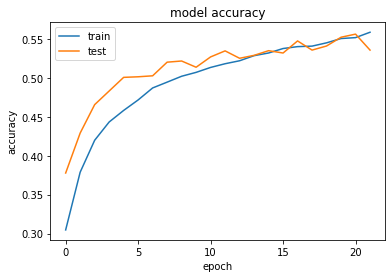

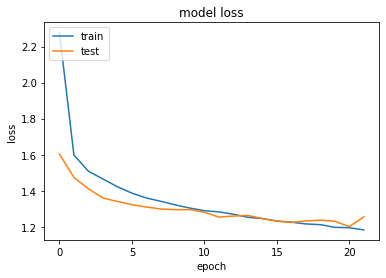

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

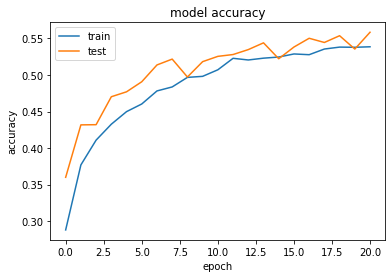

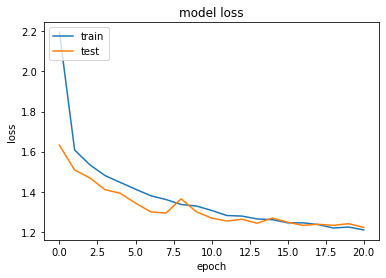

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

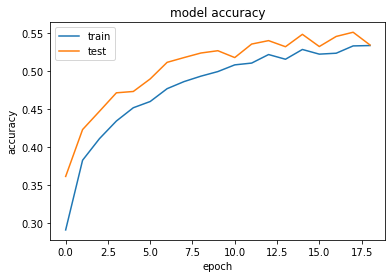

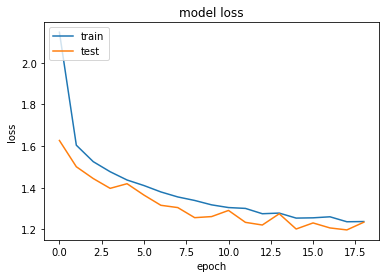

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()